In [51]:
import pathlib
from pathlib import Path

In [52]:
p = pathlib.Path("/home/yeep/project/py/AL-ACDC/data/ISIC/images")

In [53]:
len(list(p.glob("*.jpg")))

2594

In [54]:
from skimage.io import imread
import numpy as np

In [55]:
p = list(Path("/home/yeep/project/py/AL-ACDC/data/ISIC/images").glob("*.jpg"))
num_data = len(p)

2594

In [57]:
train, val = 0.7, 0.2
train, val = int(num_data * train), int(num_data * val)
test = num_data - train - val

In [58]:
train,val,test

(1815, 518, 261)

In [59]:
train, val, test = p[:train], p[train:train + val], p[train + val:train + val + test]

In [60]:
import shutil

In [63]:
for img in train:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/train/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/train/mask/"+mask_name)

In [64]:
for img in val:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/val/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/val/mask/"+mask_name)

In [65]:
for img in test:
    shutil.copy(img, "/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/test/images/"+img.name)
    mask_name = img.name[:-4]+"_segmentation.png"
    shutil.copy("/home/yeep/project/py/AL-ACDC/data/ISIC/mask/"+mask_name,"/home/yeep/project/py/AL-ACDC/data/ISICPreprocessed/test/mask/"+mask_name)

In [2]:
from torch.nn import Conv2d
import torch

In [3]:
conv = Conv2d(4,16,kernel_size=1,groups=4)
data = torch.ones((4,32,32))

In [5]:
a = conv(data)

In [6]:
a.shape

torch.Size([16, 32, 32])

In [7]:
a[:4]

tensor([[[-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331],
         [-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331],
         [-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331],
         ...,
         [-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331],
         [-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331],
         [-0.8331, -0.8331, -0.8331,  ..., -0.8331, -0.8331, -0.8331]],

        [[-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020],
         [-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020],
         [-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020],
         ...,
         [-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020],
         [-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020],
         [-1.7020, -1.7020, -1.7020,  ..., -1.7020, -1.7020, -1.7020]],

        [[ 1.1122,  1.1122,  1.1122,  ...,  1.1122,  1.1122,  1.1122],
         [ 1.1122,  1.1122,  1.1122,  ...,  1

In [8]:
a[4:8]

tensor([[[-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469],
         [-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469],
         [-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469],
         ...,
         [-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469],
         [-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469],
         [-1.3469, -1.3469, -1.3469,  ..., -1.3469, -1.3469, -1.3469]],

        [[-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676],
         [-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676],
         [-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676],
         ...,
         [-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676],
         [-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676],
         [-0.7676, -0.7676, -0.7676,  ..., -0.7676, -0.7676, -0.7676]],

        [[ 0.0161,  0.0161,  0.0161,  ...,  0.0161,  0.0161,  0.0161],
         [ 0.0161,  0.0161,  0.0161,  ...,  0

In [44]:
a = torch.ones(16,4,24,24).cuda()

In [45]:
a[:,1] = a[:,0]*2
a[:,2] = a[:,0]*3
a[:,3] = a[:,0]*4

In [46]:
b=torch.channel_shuffle(a,groups=2)

NotImplementedError: Could not run 'aten::channel_shuffle' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::channel_shuffle' is only available for these backends: [CPU, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradHIP, AutogradXLA, AutogradMPS, AutogradIPU, AutogradXPU, AutogradHPU, AutogradVE, AutogradLazy, AutogradMeta, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, AutogradNestedTensor, Tracer, AutocastCPU, AutocastCUDA, FuncTorchBatched, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PythonDispatcher].

CPU: registered at aten/src/ATen/RegisterCPU.cpp:30798 [kernel]
QuantizedCPU: registered at aten/src/ATen/RegisterQuantizedCPU.cpp:929 [kernel]
BackendSelect: fallthrough registered at ../aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at ../aten/src/ATen/core/PythonFallbackKernel.cpp:140 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at ../aten/src/ATen/functorch/DynamicLayer.cpp:488 [backend fallback]
Functionalize: registered at ../aten/src/ATen/FunctionalizeFallbackKernel.cpp:291 [backend fallback]
Named: registered at ../aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at ../aten/src/ATen/ConjugateFallback.cpp:18 [backend fallback]
Negative: registered at ../aten/src/ATen/native/NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at ../aten/src/ATen/ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at ../aten/src/ATen/core/VariableFallbackKernel.cpp:64 [backend fallback]
AutogradOther: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradCPU: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradCUDA: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradHIP: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradXLA: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradMPS: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradIPU: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradXPU: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradHPU: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradVE: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradLazy: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradMeta: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradPrivateUse1: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradPrivateUse2: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradPrivateUse3: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
AutogradNestedTensor: registered at ../torch/csrc/autograd/generated/VariableType_4.cpp:14636 [autograd kernel]
Tracer: registered at ../torch/csrc/autograd/generated/TraceType_4.cpp:12871 [kernel]
AutocastCPU: fallthrough registered at ../aten/src/ATen/autocast_mode.cpp:482 [backend fallback]
AutocastCUDA: fallthrough registered at ../aten/src/ATen/autocast_mode.cpp:324 [backend fallback]
FuncTorchBatched: registered at ../aten/src/ATen/functorch/LegacyBatchingRegistrations.cpp:743 [backend fallback]
FuncTorchVmapMode: fallthrough registered at ../aten/src/ATen/functorch/VmapModeRegistrations.cpp:28 [backend fallback]
Batched: registered at ../aten/src/ATen/BatchingRegistrations.cpp:1064 [backend fallback]
VmapMode: fallthrough registered at ../aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at ../aten/src/ATen/functorch/TensorWrapper.cpp:189 [backend fallback]
PythonTLSSnapshot: registered at ../aten/src/ATen/core/PythonFallbackKernel.cpp:148 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at ../aten/src/ATen/functorch/DynamicLayer.cpp:484 [backend fallback]
PythonDispatcher: registered at ../aten/src/ATen/core/PythonFallbackKernel.cpp:144 [backend fallback]


In [43]:
b[:,1]

tensor([[[3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         ...,
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.]],

        [[3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         ...,
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.]],

        [[3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         ...,
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.]],

        ...,

        [[3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3.,  ..., 3., 3., 3.],
         ...,
         [3., 3., 3.,  ..., 3., 3., 3.],
         [3., 3., 3., 

In [1]:
from skimage.io import imread

In [3]:
pred = imread("/home/yeep/project/py/mmseg/endovis/out/mask/0a1a2d4fc4ab9f7f19c8.png")
gt = imread("/home/yeep/project/py/mmseg/endovis/dataset-1/ann_dir/val/0a1a2d4fc4ab9f7f19c8.png")

In [5]:
from pymic.util.evaluation_seg import binary_dice

In [7]:
for i in range(4):
    print(binary_dice(pred == i, gt == i))

0.998372644307519
0.9944684496764445
0.9807311077707037
0.9494402985546266


In [2]:
import torch
from torch.cuda.amp import autocast

In [4]:
a = torch.randn(size=(16,2,2),device="cuda")
b = torch.randn(size=(16,2,2),device="cuda")
with autocast(enabled=True):
    print(torch.bmm(a, b).dtype)
    with autocast(enabled=False):
        print(torch.bmm(a, b).dtype)

torch.float16
torch.float32
torch.cuda.HalfTensor


In [1]:
import numpy as np

In [9]:
a = np.array([[0.1,0.3,0.6]])

In [10]:
np.multiply(a.T,a)

array([[0.01, 0.03, 0.06],
       [0.03, 0.09, 0.18],
       [0.06, 0.18, 0.36]])

In [11]:
import SimpleITK as sitk

In [12]:
img_npy = sitk.GetArrayFromImage(sitk.ReadImage("/home/yeep/project/py/AL-ACDC/data/ACDCprecessed/valid/patient045_frame13.nii.gz"))

In [14]:
img_npy.shape

(8, 256, 208)

In [15]:
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
p = Path("/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/")

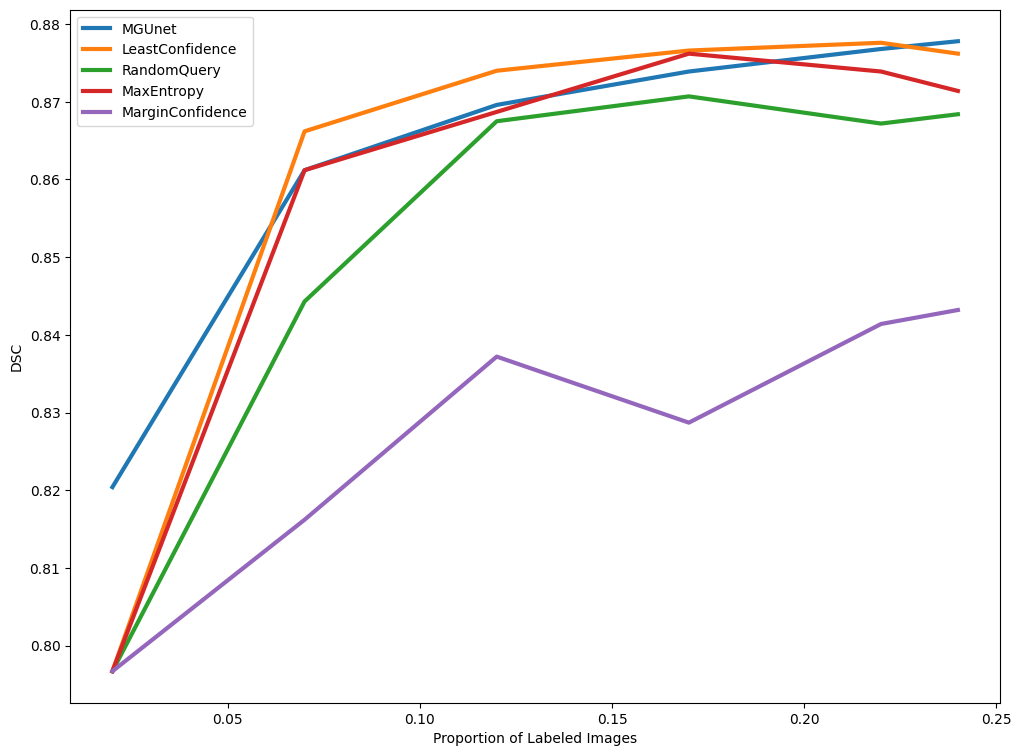

In [18]:
fig, ax = plt.subplots(figsize=(12, 9))
for r in list(p.rglob("result.txt")):
    s = ""
    with open(r) as fp:
        s = fp.readlines()
    name,x,y = r.parent.name,eval(s[0][2:]),eval(s[1][2:])
    ax.plot(x, y, label=name,linewidth=3.0)
    ax.set_xlabel("Proportion of Labeled Images")
    ax.set_ylabel("DSC")
ax.legend()
plt.show()

In [28]:
from pathlib import Path
import re

In [20]:
p = Path("/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/")

In [33]:
list(p.rglob("c[0,1,2,3,4,5,6,7]_best*"))

[PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c1_best0.8612.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c0_best0.8204.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c3_best0.8739.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c5_best0.8778.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c2_best0.8695.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/MGUnet/checkpoint/c4_best0.8768.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/LeastConfidence/checkpoint/c0_best0.7967.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/LeastConfidence/checkpoint/c2_best0.8740.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/LeastConfidence/checkpoint/c4_best0.8776.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/LeastConfidence/checkpoint/c3_best0.8766.pt'),
 PosixPath('/home/yeep/桌面/待分析/AL-ACDC/AL/alexp/LeastConfidence/checkpoint/c5_best0.8762.pt'),
 PosixPath('/home/ye

In [34]:
cmp = {'MGUnet': [0.7930083049355015, 0.8379839155252824, 0.8527463269293725, 0.8587213974659962, 0.8584270132081894, 0.8579895402418458], 'MaxEntropy': [0.76016217704285, 0.8389380167992538, 0.8501293682811276, 0.8513107519144741, 0.8486479644348865, 0.8483178951310777], 'MarginConfidence': [0.76016217704285, 0.7919676404313201, 0.7940313067419077, 0.793638557711651, 0.8196002732213667, 0.8209470855781793], 'RandomQuery': [0.76016217704285, 0.8265981943238488, 0.8386581415479499, 0.8471517410481795, 0.8452893310843443, 0.8473351143415329], 'LeastConfidence': [0.76016217704285, 0.8331825751666418, 0.8484063291130575, 0.8542146158455373, 0.8575730576099609, 0.8587918014953703]}

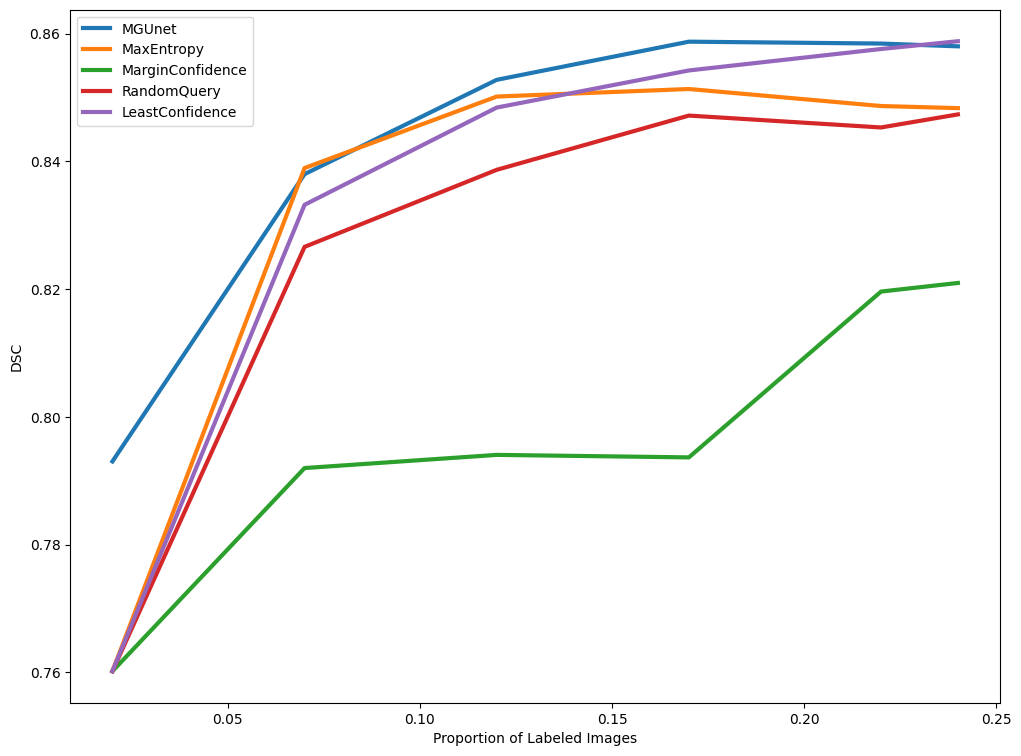

In [35]:
fig, ax = plt.subplots(figsize=(12, 9))
x = [0.02, 0.07, 0.12, 0.17, 0.22, 0.24]
for k,v in cmp.items():
    ax.plot(x, v, label=k,linewidth=3.0)
    ax.set_xlabel("Proportion of Labeled Images")
    ax.set_ylabel("DSC")
ax.legend()
plt.show()